**Клевицкий Дмитрий 25.10.24**

1) На семинаре разобрали алгоритм решения задачи китайского почтальона
2) Проблема с данными для ИП. Рассматриваю вариант с генерацией синтетических данных. Опеределяю список параметров для данных

1) Помогите R2D2 решить задачу о китайском почтальоне начиная с вершины 1 (Альдераан) и проложить самый бессмысленный маршрут для Люка Скайуокера;
2) Удалите вершину 1. Начиная с вершины 6 (Дантуин), решите задачу о китайском почтальоне.


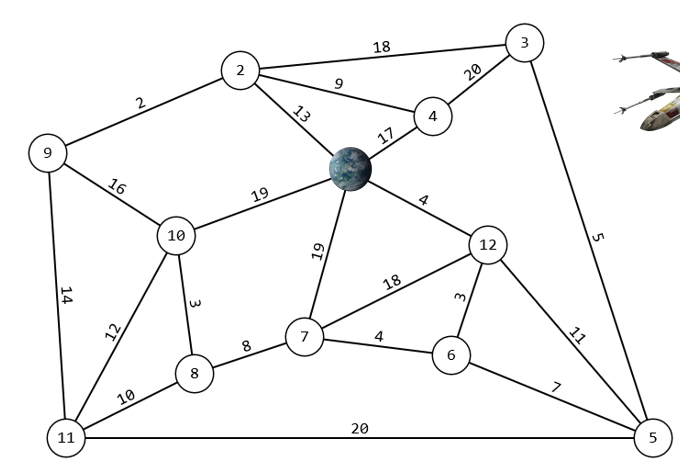

In [4]:
import networkx as nx
import numpy as np
import itertools

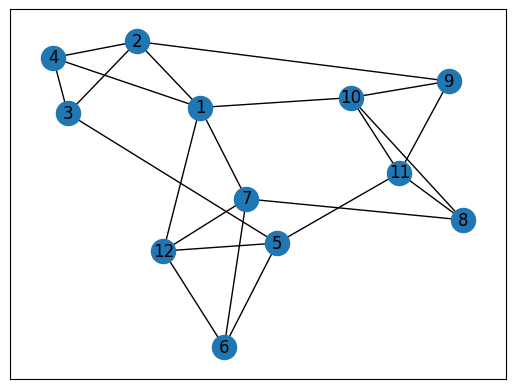

In [18]:
edges = [
    (1, 2, 13), (1, 4, 17), (1, 12, 4), ( 1, 7, 19), (1, 10, 19),
    (2, 4, 9), (2, 3, 18), (2, 9, 2),
    (3, 4, 20), (3, 5, 5),
    (5, 12, 11 ), (5, 6, 7), (5, 11, 20),
    (6, 7, 4), (6, 12, 3),
    (7, 12, 18), (7, 8, 8),
    (8, 10, 3), (8, 11, 10),
    (9, 11, 14), (9, 10, 16),
    (10, 11, 12)
]
G = nx.Graph()
G.add_weighted_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True)

In [22]:
G_multi[1]

AdjacencyView({2: {0: {'weight': 13}}, 4: {0: {'weight': 17}, 1: {'weight': 0}}, 12: {0: {'weight': 4}}, 7: {0: {'weight': 19}}, 10: {0: {'weight': 19}}})

In [ ]:
# Вычисляем нечётные вершины
odd_nodes = [v for v, d in G.degree() if d % 2 == 1]

# Если есть нечётные вершины, находим минимальные ребра, чтобы сделать бы парное число ребер у каждой вершины
if odd_nodes:
    odd_subgraph = G.subgraph(odd_nodes)
    min_weight_match = nx.algorithms.matching.min_weight_matching(odd_subgraph)
    H = nx.MultiGraph()
    H.add_weighted_edges_from(edges)
    for u, v in min_weight_match:
        H.add_edge(u, v, weight=0)
    eulerian_circuit = list(nx.eulerian_circuit(H))
else:
    eulerian_circuit = list(nx.eulerian_circuit(G))

# Считаем стоимость пути
total_weight = sum(H[u][v]['weight'] for u, v in eulerian_circuit)

# Возвращаем полученный путь и его стоимость
print(f'Путь:\n{eulerian_circuit}')
print(f'Общая стоимость: {total_weight}')
